Importing the required libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

Loading the data

In [2]:
df = pd.read_csv('C:\\Users\\Aditya Kadam\\Downloads\\health\\mental_health.csv')
df

text  label
0      dear american teens question dutch person hear...      0
1      nothing look forward lifei dont many reasons k...      1
2      music recommendations im looking expand playli...      0
3      im done trying feel betterthe reason im still ...      1
4      worried  year old girl subject domestic physic...      1
...                                                  ...    ...
27972  posting everyday people stop caring  religion ...      0
27973  okay definetly need hear guys opinion ive pret...      0
27974  cant get dog think ill kill myselfthe last thi...      1
27975  whats point princess bridei really think like ...      1
27976  got nudes person might might know snapchat do ...      0

[27977 rows x 2 columns]

Data Preprocessing

Here we will use different techniques such as Tokenization and Stop word removal method.

First we will start by using the stop word removal method

In [3]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

def remove_stopwords(text):
    cleaned_text = ' '.join([word for word in text.split() if word.lower() not in stopwords.words('english')])
    return cleaned_text

df['cleaned_text'] = df['text'].apply(remove_stopwords)

df 

[nltk_data] Downloading package stopwords to C:\Users\Aditya
[nltk_data]     Kadam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


text  label  \
0      dear american teens question dutch person hear...      0   
1      nothing look forward lifei dont many reasons k...      1   
2      music recommendations im looking expand playli...      0   
3      im done trying feel betterthe reason im still ...      1   
4      worried  year old girl subject domestic physic...      1   
...                                                  ...    ...   
27972  posting everyday people stop caring  religion ...      0   
27973  okay definetly need hear guys opinion ive pret...      0   
27974  cant get dog think ill kill myselfthe last thi...      1   
27975  whats point princess bridei really think like ...      1   
27976  got nudes person might might know snapchat do ...      0   

                                            cleaned_text  
0      dear american teens question dutch person hear...  
1      nothing look forward lifei dont many reasons k...  
2      music recommendations im looking expand playli...  
3      im done trying feel betterthe reason im still ...  
4      worried year old girl subject domestic physica...  
...                                                  ...  
27972  posting everyday people stop caring religion m...  
27973  okay definetly need hear guys opinion ive pret...  
27974  cant get dog think ill kill myselfthe last thi...  
27975  whats point princess bridei really think like ...  
27976  got nudes person might might know snapchat ok ...  

[27977 rows x 3 columns]

Here we will do the tokenization of the text

In [4]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# tokenize the each row individually 
tokenized_texts = []

for index, row in df.iterrows():
    text_data = row['cleaned_text']
    tokens = word_tokenize(text_data)
    tokenized_texts.append(tokens)

df['tokens'] = tokenized_texts
df

[nltk_data] Downloading package punkt to C:\Users\Aditya
[nltk_data]     Kadam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


text  label  \
0      dear american teens question dutch person hear...      0   
1      nothing look forward lifei dont many reasons k...      1   
2      music recommendations im looking expand playli...      0   
3      im done trying feel betterthe reason im still ...      1   
4      worried  year old girl subject domestic physic...      1   
...                                                  ...    ...   
27972  posting everyday people stop caring  religion ...      0   
27973  okay definetly need hear guys opinion ive pret...      0   
27974  cant get dog think ill kill myselfthe last thi...      1   
27975  whats point princess bridei really think like ...      1   
27976  got nudes person might might know snapchat do ...      0   

                                            cleaned_text  \
0      dear american teens question dutch person hear...   
1      nothing look forward lifei dont many reasons k...   
2      music recommendations im looking expand playli...   
3      im done trying feel betterthe reason im still ...   
4      worried year old girl subject domestic physica...   
...                                                  ...   
27972  posting everyday people stop caring religion m...   
27973  okay definetly need hear guys opinion ive pret...   
27974  cant get dog think ill kill myselfthe last thi...   
27975  whats point princess bridei really think like ...   
27976  got nudes person might might know snapchat ok ...   

                                                  tokens  
0      [dear, american, teens, question, dutch, perso...  
1      [nothing, look, forward, lifei, dont, many, re...  
2      [music, recommendations, im, looking, expand, ...  
3      [im, done, trying, feel, betterthe, reason, im...  
4      [worried, year, old, girl, subject, domestic, ...  
...                                                  ...  
27972  [posting, everyday, people, stop, caring, reli...  
27973  [okay, definetly, need, hear, guys, opinion, i...  
27974  [cant, get, dog, think, ill, kill, myselfthe, ...  
27975  [whats, point, princess, bridei, really, think...  
27976  [got, nudes, person, might, might, know, snapc...  

[27977 rows x 4 columns]

Now we will do feature extraction by using Doc2Vec embeddings and then use that a feature  for traning our model

In [ ]:
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

tokenized_data = df['tokens'].tolist()

tagged_data = [TaggedDocument(words=words, tags=[str(i)]) for i, words in enumerate(tokenized_data)]

model = Doc2Vec(vector_size=20,
                window=2,
                min_count=1,
                workers=4,
                epochs=100)

model.build_vocab(tagged_data)

model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

model.save("doc2vec_model")

document_embeddings = [model.dv[i] for i in range(len(tokenized_data))]

for i, embedding in enumerate(document_embeddings):
    print(f"Document {i+1} Embedding: {embedding}")

Document 1 Embedding: [ 3.0490615e+00  1.2595476e-01 -1.7116881e-03 -1.8593516e+00
 -9.3371922e-01 -6.0289377e-01  4.2189771e-01  8.5404575e-01
 -2.0148141e+00  4.4158036e-01  8.2123965e-01  1.5985810e+00
 -2.2683249e+00 -6.5073472e-01  1.8428260e-01  1.2320620e+00
  5.1114261e-01 -4.3863711e-01 -9.3639076e-01 -7.1865451e-01]
Document 2 Embedding: [ 0.6231178   1.052722   -1.2197782   0.1378737   0.9698057   0.6582169
 -0.917928   -0.9555756  -0.15591331 -0.6578714   1.6689249  -0.6457515
  1.4418712   0.13519774  2.1917877   0.26502153  0.9920309  -2.409865
  1.5286376  -2.9678874 ]
Document 3 Embedding: [ 1.5900999   0.49383834  0.8375463  -0.1297818  -3.0113044   2.4716682
  3.194388   -1.0789393  -2.2632315  -0.8619549   3.8467271   1.2703621
  0.46916384 -3.131293    0.86840713  0.01459296 -1.8029332  -2.1857576
  0.9892758  -4.232826  ]
Document 4 Embedding: [-0.31735972  2.064413   -0.6679175   1.1606609   1.0267081  -1.201894
 -1.3745095   0.7962343  -0.2683362  -0.85212636  0.

Here we will start the process of building the model...we will divide the dataset into 3 parts...Training set, Cross Validation set and Test set

In [9]:
# For features we are going to use Doc2Vec embeddings
X = document_embeddings
y = df['label']

# Dividing the data between train and temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# diving the temp data between cross-validation and test
X_cv, X_test, y_cv, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

First we will fit the model and predict on the training and cross validation set

In [15]:
model = LogisticRegression(penalty='l1', C=1.0, solver='liblinear')

model.fit(X_train, y_train)

# Predicting on the training dataset
y_train_pred = model.predict(X_train)

# Predicting on the cross-validation dataset
y_cv_pred = model.predict(X_cv)

# Evaluating the model's performance on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred)
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)

# Evaluating the model's performance on the cross-validation data
cv_accuracy = accuracy_score(y_train, y_train_pred)
cv_report = classification_report(y_train, y_train_pred)
cv_confusion_matrix = confusion_matrix(y_train, y_train_pred)

print("Training Set Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print("Classification Report:")
print(train_report)
print("Confusion Matrix:")
print(train_confusion_matrix)

print("\nCross-Validation Set Metrics:")
print(f"Accuracy: {cv_accuracy:.2f}")
print("Classification Report:")
print(cv_report)
print("Confusion Matrix:")
print(cv_confusion_matrix)

Training Set Metrics:
Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      8455
           1       0.90      0.89      0.89      8331

    accuracy                           0.89     16786
   macro avg       0.89      0.89      0.89     16786
weighted avg       0.89      0.89      0.89     16786

Confusion Matrix:
[[7594  861]
 [ 938 7393]]

Cross-Validation Set Metrics:
Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      8455
           1       0.90      0.89      0.89      8331

    accuracy                           0.89     16786
   macro avg       0.89      0.89      0.89     16786
weighted avg       0.89      0.89      0.89     16786

Confusion Matrix:
[[7594  861]
 [ 938 7393]]


Now we will predict on the test dataset

In [16]:
y_test_pred = model.predict(X_test)

# Evaluating the model's performance on the test dataset
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

print("Training Set Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print("Classification Report:")
print(test_report)
print("Confusion Matrix:")
print(test_confusion_matrix)

Training Set Metrics:
Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      7126
           1       0.89      0.88      0.89      6863

    accuracy                           0.89     13989
   macro avg       0.89      0.89      0.89     13989
weighted avg       0.89      0.89      0.89     13989

Confusion Matrix:
[[6383  743]
 [ 791 6072]]


Graphical representation of the model using ROC curve

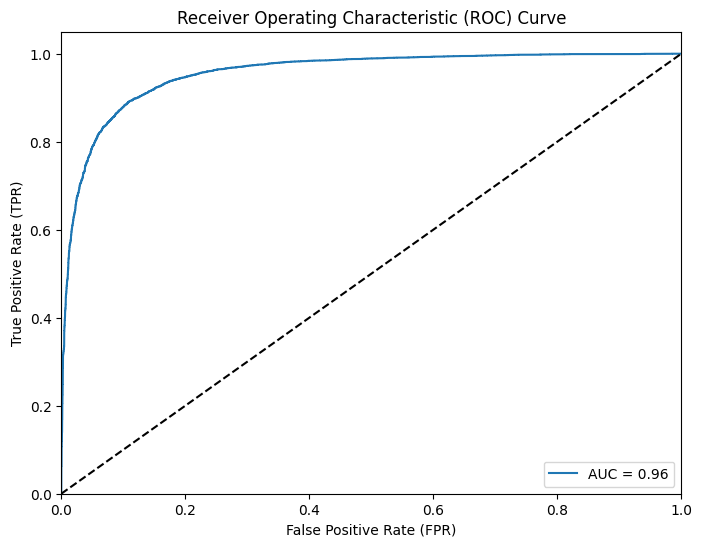

In [18]:
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Create the ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()